# NLTK - Data

 If you have never used NLTK before, you need to run the code below to install the relevant components.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

The code below can be used to add POS tags to all the texts in your corpus. It will create new fileswith the extension 'pos'. Running this code may take a while.

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
from os.path import join

dir = 'Corpus'

for file in os.listdir(dir):
    if re.search( 'txt$' , file ):
        print('Creating POS Tags for ' + file + ' ... ' )
        fullText = open( join( dir , file ) , encoding= 'utf-8' ).read()
        outFile = re.sub( 'txt$' , 'pos' , file )
        out = open( join( dir , outFile ) , 'w' ,  encoding= 'utf-8' )
        
        sentences = sent_tokenize(fullText)
        for s in sentences:
            words = word_tokenize(s)
            pos = nltk.pos_tag(words)

            for p in pos:
                out.write( p[0] + '/' + p[1] + ' ' )
            out.write('\n' )
        out.close()

        
print('Done')        



Creating POS Tags for eagleton-1992.txt ... 
Creating POS Tags for eagleton-2009.txt ... 
Creating POS Tags for eagleton-2018a.txt ... 
Creating POS Tags for eagleton-2018b.txt ... 
Creating POS Tags for eagleton-2019.txt ... 
Creating POS Tags for eargleton-1988.txt ... 
Creating POS Tags for eargleton-1998.txt ... 
Creating POS Tags for Moretti-1994.txt ... 
Creating POS Tags for moretti-2000.txt ... 
Creating POS Tags for moretti-2000b.txt ... 
Creating POS Tags for moretti-2001.txt ... 
Creating POS Tags for moretti-2003.txt ... 
Creating POS Tags for Moretti-2015.txt ... 
Creating POS Tags for moretti-2017.txt ... 
Creating POS Tags for moretti-2019.txt ... 
Creating POS Tags for moretti-2020.txt ... 
Creating POS Tags for vanderWeel-2000.txt ... 
Creating POS Tags for vanDerWeel-2002.txt ... 
Creating POS Tags for vanDerWeel-2013a.txt ... 
Creating POS Tags for vanDerWeel-2015.txt ... 
Creating POS Tags for vanDerWeel-2016.txt ... 
Done


The code below defines a number of methods. Simply the code below to make sure that you can use these methods.

In [2]:
import nltk
import os
from nltk.tokenize import sent_tokenize, word_tokenize

pos = dict()


def getTitle( fileName ):
    fileName = os.path.basename(fileName)
    title = re.sub( r'[.]txt$' , '' , fileName )
    return title

def countTokens(text):
    words = word_tokenize(text)
    return len(words)
    
def averageSentenceLength(text):
    sentences = sent_tokenize(text)
    return countTokens(text) / len(sentences)

def typeTokenRatio(text , cap ):
    words = word_tokenize(text)
    words = words[ 0 : cap ]
    unique = dict()
    for w in words:
        unique[w] = unique.get( w, 0 ) + 1
    return len(unique) / len(words)

def countPosTags( text , tagList ):
    count = 0 
    fileName = re.sub( 'txt$' , 'pos' , text )
    posFile = open( fileName ,  encoding= 'utf-8' ) 
    for p in posFile:
        words = word_tokenize(p)
        for w in words:
            if re.search( '/' , w ):
                token = w[ 0 : w.index('/') ]
                tag = w[ w.index('/')+1 : len(w)  ]
                if tag in tagList:
                    count += 1
    return count

def showPosTags( text , tagList ):
    tokens = []
    fileName = re.sub( 'txt$' , 'pos' , text )
    posFile = open( fileName ,  encoding= 'utf-8' ) 
    for p in posFile:
        words = word_tokenize(p)
        for w in words:
            if re.search( '/' , w ):
                token = w[ 0 : w.index('/') ]
                tag = w[ w.index('/')+1 : len(w)  ]
                if tag in tagList:
                    tokens.append( token )
    return tokens


def countPosTags2( text , tagList ):
    count = 0 
    fileName = re.sub( 'txt$' , 'pos' , text )
    posFullText = open( fileName ,  encoding= 'utf-8' ).read()
    for t in tagList:
        hits = re.findall( r'[/]{}\b'.format( t ) , posFullText )
        count += len(hits)
    return count



def numberOfSyllables(text):
    nrSyllables = 0 
    words = word_tokenize(text)
    for w in words:
        syll = countSyllables(w)
        if syll > 1:
            nrSyllables += countSyllables(w) 
        elif( re.search( r'\w' , w ) ):
            nrSyllables += 1
    return nrSyllables

def countSyllables( word ):
    pattern = "e?[aiou]+e*|e(?!d$|ly).|[td]ed|le$|ble$|a$"
    syllables = re.findall( pattern , word )
    return len(syllables)

def fleschKincaid( text ):

    totalWords = countTokens(text)
    totalSentences = len( sent_tokenize(text) )
    totalSyllables = numberOfSyllables( text )

    fk = 0.39 * (  totalWords / totalSentences )
    fk = fk + 11.8 * ( totalSyllables / totalWords )
    fk = fk - 15.59
    return fk

                

Next, run the following code to make a first data set in CSV format.

In [3]:
import os
from os.path import join
import re

dir = 'Corpus'
texts = []
pos = []

out = open( 'nltk.csv' , 'w' ,  encoding= 'utf-8' )

out.write( 'title,tokens,avgSentLength,ttr,adjectives,adverbs,nrSyllables,fk\n' )


for file in os.listdir(dir):
    if re.search( 'txt$' , file ):
        texts.append( join( dir , file ) )

for text in texts:
    print( 'Collecting data for ' + text + ' ... ')
    fullText = open( text , encoding = 'utf-8' ).read()
    out.write( getTitle( text ) + ',' )
    tokens = countTokens(fullText)
    out.write( '{},'.format( tokens ) )
    out.write( '{},'.format( averageSentenceLength(fullText)) )
    out.write( '{},'.format( typeTokenRatio(fullText , 1000 )) )
    adjectives = [ 'JJ' , 'JJR' , 'JJS' ]
    nrAdjectives = countPosTags( text , adjectives )
    adverbs = [ 'RB' , 'RBR' , 'RBS' ]
    nrAdverbs = countPosTags( text , adverbs )
    out.write( '{},'.format( nrAdjectives / tokens  ) )
    out.write( '{},'.format( nrAdverbs / tokens  ) )
    out.write( '{},'.format( numberOfSyllables(fullText) ) )  
    out.write( '{}'.format( fleschKincaid(fullText) ) )      
    
    out.write( '\n' )
    
out.close()    

print("Done!")


Done!


Using the CSV that was just created, a number of basic visualisations can be produced. The cell below creates a bar chart. 

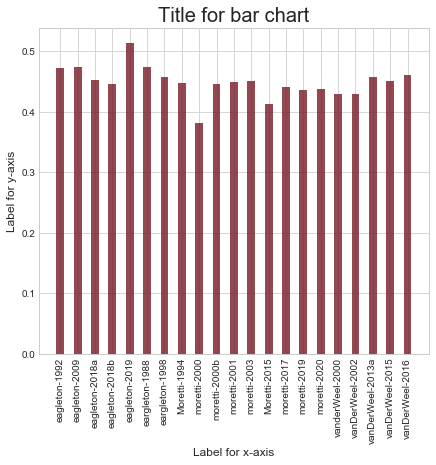

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv( 'nltk.csv' , index_col=False , decimal = '.' )


fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()


bar_width = 0.45
opacity = 0.8

ax.bar( df['title'] , df['ttr'] , width = bar_width, alpha = opacity , color = '#781926')

plt.xticks(rotation= 90)

ax.set_xlabel('Label for x-axis' , fontsize= 12)
ax.set_ylabel('Label for y-axis' , fontsize = 12 )
ax.set_title( 'Title for bar chart' , fontsize=20 )


plt.show()


The cell below creates a scatter plot, which can be used to compare the values of two variables. The two variables to be plotted are defined by the two variables named 'x' and 'y'. 

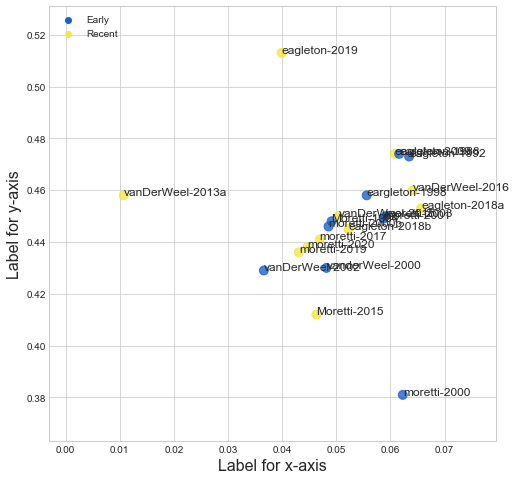

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv( 'dataset.csv' , index_col=False , decimal = '.' )

colours = []



## Create colour list
for c in df['class'].tolist():
    if c == 'early':
        colours.append('#1e60c9')
    else:
        colours.append('#f0e748')

        


plt.style.use('seaborn-whitegrid')

x = 'adverbs'
y = 'ttr'


fig = plt.figure( figsize = ( 8,8 ))
ax = plt.axes()


ax.scatter(  df[x]  , df[y] , alpha=0.8,  s=80 , c = colours )


#for index, column in df.iterrows():
#    ax.annotate( df[x]  , df[y] , df['title'] )


for index, row in df.iterrows():
    plt.text( row[x], row[y] , row['title'] , fontsize=12)



ax.set_xlabel('Label for x-axis' , fontsize = 16 )
ax.set_ylabel('Label for y-axis' , fontsize = 16 )


ax.scatter( [] , [] , c = '#1e60c9' , label = 'Early')
ax.scatter( [] , [] , c = '#f0e748' , label = 'Recent')


ax.legend(loc='upper left', frameon=False) 

plt.show()